Name(s): Andrew Tran, Abhay Raghavan, William Kim, Brandon Woo, Aidan Brennan

CS 3654 Group 15

CS 3654 Team Project Part 3 Deliverable

Project Introduction (Recap):

We will be analyzing datasets containing data that distinguishes between Twitter bot accounts and 'human' accounts. Bot accounts have been growing on the platform in recent times and Twitter has had to suspend accounts that were spreading misinformation. We want to obtain information about Twitter user accounts and identify trends in bot accounts versus human accounts in order to help better distinguish between them.

- Initial Research Questions:
  
  (1) In what ways do bot accounts differ from human accounts on Twitter in terms of functionality on the platform?
  
  (2) How much information can be obtained from a public Twitter profile?

# What characterizes Twitter bot accounts vs. human accounts?

## Question

Over the past 3 years, Twitter has seen significantly more bot accounts registered on its platform. In some cases, this has led to a rise in mischieveous or inappropriate activity on the platform, and as a result, Twitter has had to suspend accounts that were spreading misinformation. We want to obtain information about Twitter user accounts and identify trends in bot accounts versus human accounts in order to help better distinguish between them.

Kaggle contains a dataset that categorizes a list of twitter accounts by identifying them as either bot or human. This dataset can be found here: https://www.kaggle.com/datasets/davidmartngutirrez/twitter-bots-accounts.

But what are the best metrics we can use to differentiate between Twitter bot and human accounts? When obtaining data from Twitter accounts, there are many different identifiers that can be webscraped or are easily visible.

Overview of our method: use ID's from dataset, webscrape Twitter accounts to obtain number of likes, retweets, and replies for tweets within the past 2 years, obtain dataset from webscraping, merged with initial data set using key column of 'id', sorted and grouped by different categories ("Bot" vs. "Human" as well as separated posts by ID), and lastly analyzed the grouped-columns for descriptive statistics to gather information about the mean, median, and range of each respective group. 

## Analysis

Here, we scrape the data from Twitter accounts using the ID's from the initial Kaggle dataset(**note: running the scraper takes a very long time to run**):

In [ ]:
import csv, twint, time, io, sys, warnings
from datetime import datetime, timedelta

class TwitterManager():
    '''
    When initialized, suppress warnings. Don't want to console
    to be spammed by pandas warnings
    '''
    def __init__(self):
        warnings.filterwarnings("ignore")
        return
    '''
    Using ids present in the twitter_human_bots_dataset,
    search twitter for tweets from those IDs and store certain information
    about them in a DataFrame, which is later
    converted into a csv file.
    '''
    def get_data(self):
        fileName = 'twitter_human_bots_dataset.csv'
        whole_table = pandas.DataFrame()
        total_length = len(pandas.read_csv(fileName))
        with open(fileName) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter='\n')
            line_count = 0
            for row in csv_reader:
                if line_count == 0:
                    line_count += 1
                    continue
                data = row[0].split(',')
                id = data[0]
                self.disable_printing()
                '''
                Attempting to get twitter data for an id
                '''
                try:
                    time.sleep(1)
                    table = self.find_tweets_with_id(id)
                except Exception as e:
                    self.enable_printing()
                    print("[" + str(line_count) + " / " + str(total_length) + "]")
                    line_count += 1
                    print("Error getting tweets for " + id + ".  Skipping and continuing")
                    print(e)
                    continue
                self.enable_printing()
                print("[" + str(line_count) + " / " + str(total_length) + "]")
                line_count += 1
                if table.empty:
                    continue
                table['bot_or_human'] = data[1]
                if whole_table.empty:
                    whole_table = table
                else:
                    whole_table = pandas.concat([whole_table, table])
        whole_table.to_csv('twitter_data.csv')
    '''
    Helper function for get_data. This function
    specifically handles getting information from twitter.
    '''
    def find_tweets_with_id(self, id):
        endingTime = self.datetime_to_string(datetime.now())
        #endingTime = self.datetime_to_string(end)
        startingTime = "2021-01-01"
        c = twint.Config()
        #c.Search = id
        c.Since = startingTime
        c.Until = endingTime
        c.Limit = 5
        c.Store_object = True
        c.Lang = 'en'
        c.Pandas = True
        c.User_id = id
        twint.run.Search(c)
        table = twint.storage.panda.Tweets_df
        if table.empty:
            return table
        return table[['id', 'tweet', 'hashtags', 'cashtags', 'user_id', 'nlikes', 'nreplies', 'nretweets']]
    '''
    This simple helper function is for
    convenience of converting the current datetime to
    the correct string for the twint API call.
    '''
    def datetime_to_string(self, date):
        return date.strftime("%Y-%m-%d")
    '''
    Disables printing to the console. This function
    was made in order to supress twints console printing, which
    it does every time it gets data from twitter.

    This gets annoying, so I disable it.
    '''
    def disable_printing(self):
        trap = io.StringIO()
        sys.stdout = trap
        return
    '''
    Re-Enables printing to the console.
    '''
    def enable_printing(self):
        sys.stdout = sys.__stdout__
        return



Here, we display the contents of the csv file (top 5 and bottom 5 rows) that stores the webscraper data. Each row contains information about a specific tweet from a specific account that is signified by id.:

In [1]:
import pandas, numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

scraperdata = pandas.read_csv("twitter_data.csv", index_col=[0])
scraperdata

,id,tweet,hashtags,cashtags,user_id,nlikes,nreplies,nretweets,bot_or_human
0,1584288573440036864,"Put the ""Bite"" into ""Exhibited"" https://t.co/...",[],[],787405734442958848,2,0,0,bot
1,1584243270632497152,"You can't get the ""Sin"" out of ""Nosiness"" htt...",[],[],787405734442958848,4,0,2,bot
2,1584197985990504449,"Let's put the ""Earl"" into ""Fearless"" https://...",[],[],787405734442958848,0,0,0,bot
3,1584152675314458624,"Be the ""Nab"" in ""Cinnabar"" https://t.co/tF0cM...",[],[],787405734442958848,0,0,0,bot
4,1584107378420887552,"We need ""Cat"" to spell ""Obfuscate"" https://t....",[],[],787405734442958848,3,0,0,bot
...,...,...,...,...,...,...,...,...,...
15,1529515450316382208,"@Tagard_McStone Let's not be too harsh now, ju...",[],[],815529979,1,0,0,human
16,1522622120529842176,@Tumbledorez This was a whole Habbo Mood™ htt...,[],[],815529979,1,0,0,human
17,1521197191821336576,@Tumbledorez Just wait until I hit you with th...,[],[],815529979,0,0,0,human
18,1521190723147628544,It was so cool to not only be celebrated for o...,[],[],815529979,2,0,0,human


We also take the original Kaggle data and set it equal to a variable that stores Twitter account id's and their categorization of either bot or human account.

In [2]:
twitdata = pandas.read_csv("twitter_human_bots_dataset.csv")
twitdata

,id,account_type
0,787405734442958848,bot
1,796216118331310080,human
2,875949740503859204,human
3,756119643622735875,human
4,464781334,human
...,...,...
37433,63963107,human
37434,1064042478,human
37435,1089732602,human
37436,815529979,human


# Data Cleaning

Next, we group data from the csv file by user_id. This groups together tweets from a specific Twitter account. 

In [3]:
groupbyData = scraperdata.groupby('user_id')

Then, we decided upon metrics to statistically describe information about these Twitter accounts. We realized that some accounts would have significantly higher or fewer like, retweet, and reply counts for their tweets. Thus, we felt that using the mean value as a descriptive statistic would not be optimal since outliers would be taken into consideration, and our evaluation may be biased or potentially skewed. 

We proceeded by taking a look at the median number of likes/retweets/replies for each group, since median is an outlier-resistant statistic. 

In [4]:
groupbyData.nlikes.median()

user_id
418                     3.0
586                    12.5
10202                   1.0
12522                   1.0
13253                   0.0
                       ... 
1101849622073491456     0.0
1107378463114227712     0.0
1109778441379950592     1.0
1113425507624919040     0.0
1113577200664629249     0.0
Name: nlikes, Length: 15392, dtype: float64

In [5]:
groupbyData.nreplies.median()

user_id
418                    1.0
586                    1.0
10202                  1.0
12522                  1.0
13253                  0.0
                      ... 
1101849622073491456    0.0
1107378463114227712    0.0
1109778441379950592    0.0
1113425507624919040    0.0
1113577200664629249    0.0
Name: nreplies, Length: 15392, dtype: float64

In [6]:
groupbyData.nretweets.median()

user_id
418                    0.0
586                    0.0
10202                  0.0
12522                  0.0
13253                  0.0
                      ... 
1101849622073491456    0.0
1107378463114227712    0.0
1109778441379950592    0.0
1113425507624919040    0.0
1113577200664629249    0.0
Name: nretweets, Length: 15392, dtype: float64

After looking at medians, however, we realized another way to describe data about specific Twitter accounts would be just using the total number of likes, retweets, and replies. This may work better than using the median values because some tweets for an account may get significantly more impressions than another, and the median value may not always account for that. That being said, we also have to take into consideration that the number of tweets in group is not the same because some accounts may have had more tweets published since January 2021 than other accounts. 

Below, we made a new dataframe that contains the total number of likes, replies, and retweets for each twitter user grouped from the original data. Then we merged this with the data with the original Kaggle data to classify user account data by both statistical metrics and categorial metrics that signified if an account was bot or human.

In [7]:
summed_data = pandas.DataFrame({"Likes" : groupbyData.nlikes.sum(), "Replies" : groupbyData.nreplies.sum(), "Retweets" : groupbyData.nretweets.sum()})
merged_sum_data = pandas.merge(summed_data, twitdata, left_on = 'user_id', right_on = 'id')
merged_sum_data

,Likes,Replies,Retweets,id,account_type
0,97,42,10,418,human
1,785,36,44,586,human
2,53,26,3,10202,human
3,99,22,6,12522,human
4,18,8,0,13253,human
...,...,...,...,...,...
15387,1,0,0,1101849622073491456,bot
15388,3,0,0,1107378463114227712,bot
15389,72,8,6,1109778441379950592,bot
15390,0,0,0,1113425507624919040,bot


After getting our results, we then normalized our data so that we could more easily visualize and scale our data, ensuring our skew is minimal. We normalized all of the quantitiative columns except for 'id', which represents the Twitter account id.

In [8]:
norm_sum = merged_sum_data.copy()
norm_sum['Likes'] = (norm_sum.Likes - norm_sum.Likes.mean()) / norm_sum.Likes.std()
norm_sum['Replies'] = (norm_sum.Replies - norm_sum.Replies.mean()) / norm_sum.Replies.std()
norm_sum['Retweets'] = (norm_sum.Retweets - norm_sum.Retweets.mean()) / norm_sum.Retweets.std()
norm_sum

,Likes,Replies,Retweets,id,account_type
0,-0.104281,-0.086889,-0.091494,418,human
1,-0.099247,-0.088083,-0.089421,586,human
2,-0.104603,-0.090074,-0.091921,10202,human
3,-0.104266,-0.090870,-0.091738,12522,human
4,-0.104859,-0.093656,-0.092104,13253,human
...,...,...,...,...,...
15387,-0.104983,-0.095249,-0.092104,1101849622073491456,bot
15388,-0.104969,-0.095249,-0.092104,1107378463114227712,bot
15389,-0.104464,-0.093656,-0.091738,1109778441379950592,bot
15390,-0.104991,-0.095249,-0.092104,1113425507624919040,bot


# Linear Regression Plots

We then plotted linear regression graphs to see how well the normalized number of replies and retweets are predicted by the number of likes a tweet gets for all of the Twitter accounts in our datset.

(array([0.74569554]), 1.3769453018416436e-18)

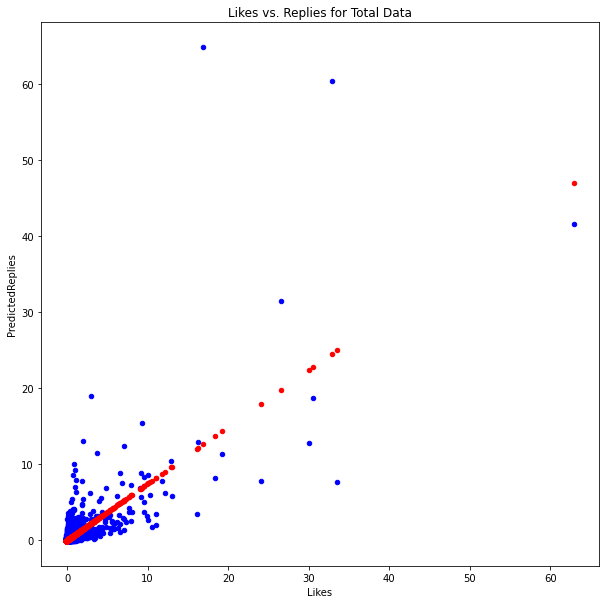

In [9]:
lm1 = LinearRegression().fit(norm_sum[['Likes']], norm_sum.Replies)
norm_sum['PredictedReplies'] = lm1.predict(norm_sum[['Likes']])
ax = norm_sum.plot.scatter(x = 'Likes', y = 'Replies', color = 'blue')
norm_sum.plot.scatter(x = 'Likes', y = 'PredictedReplies', ax=ax, color = 'red', figsize = (10, 10))
plt.title('Likes vs. Replies for Total Data')
lm1.coef_, lm1.intercept_

(array([0.85236142]), 5.266956051150244e-18)

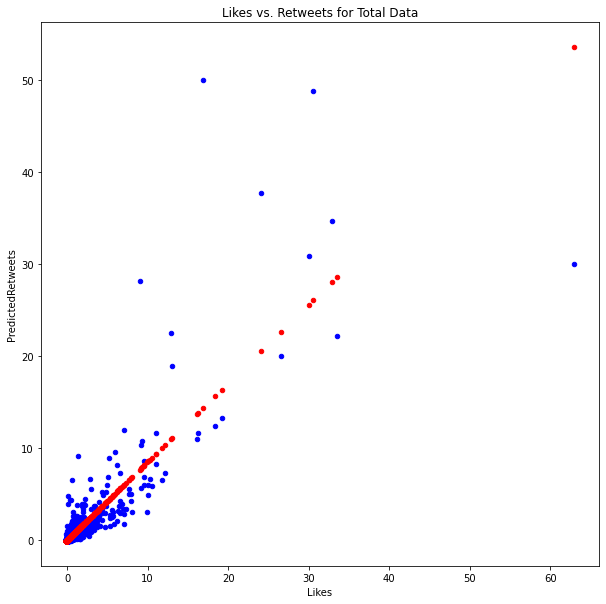

In [10]:
lm2 = LinearRegression().fit(norm_sum[['Likes']], norm_sum.Retweets)
norm_sum['PredictedRetweets'] = lm2.predict(norm_sum[['Likes']])
ax = norm_sum.plot.scatter(x = 'Likes', y = 'Retweets', color = 'blue')
norm_sum.plot.scatter(x = 'Likes', y = 'PredictedRetweets', ax=ax, color = 'red', figsize = (10, 10))
plt.title('Likes vs. Retweets for Total Data')
lm2.coef_, lm2.intercept_

While the above plots provide us a linear regression of all of the Twitter account data, since we are looking at differences between human and bot accounts, we wanted to filter our data to contain info about just human and bot accounts, and then do regression analysis on that. We created 2 filtered datasets from the norm_sum dataset to separate human and bot data. Below are 4 plots - similar to the above graphs, we observe how well retweets and replies can be the number of likes for a Twitter account. 2 plots correspond to human accounts only and the other 2 correspond to bot accounts only.

In [11]:
norm_sum_human = norm_sum[norm_sum.account_type == "human"]
norm_sum_bot = norm_sum[norm_sum.account_type == "bot"]
norm_sum_bot

,Likes,Replies,Retweets,id,account_type,PredictedReplies,PredictedRetweets
7,-0.104654,-0.093856,-0.091494,30973,bot,-0.078040,-0.089203
14,-0.104032,-0.094055,-0.089970,622143,bot,-0.077576,-0.088673
19,-0.102042,-0.089477,-0.081068,717313,bot,-0.076092,-0.086977
21,-0.036126,0.279737,0.046845,742143,bot,-0.026939,-0.030792
26,-0.061449,0.158324,-0.001564,759251,bot,-0.045822,-0.052377
...,...,...,...,...,...,...,...
15387,-0.104983,-0.095249,-0.092104,1101849622073491456,bot,-0.078286,-0.089484
15388,-0.104969,-0.095249,-0.092104,1107378463114227712,bot,-0.078275,-0.089471
15389,-0.104464,-0.093656,-0.091738,1109778441379950592,bot,-0.077898,-0.089041
15390,-0.104991,-0.095249,-0.092104,1113425507624919040,bot,-0.078291,-0.089490


C:\Users\andre\AppData\Local\Temp\ipykernel_19496\3898201197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_sum_human.PredictedRetweets = lm_human_retweets.predict(norm_sum_human[['Likes']])


(array([0.85223847]), -0.0010770727979070322)

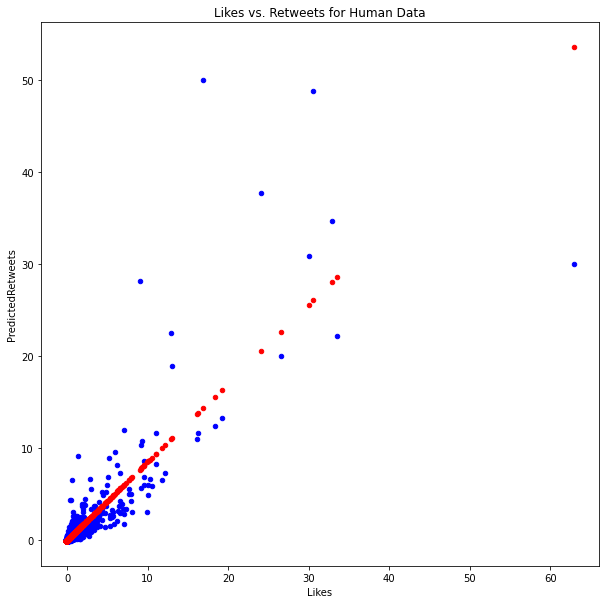

In [12]:
lm_human_retweets = LinearRegression().fit(norm_sum_human[['Likes']], norm_sum_human.Retweets)
norm_sum_human.PredictedRetweets = lm_human_retweets.predict(norm_sum_human[['Likes']])
ax = norm_sum_human.plot.scatter(x = 'Likes', y = 'Retweets', color = 'blue')
norm_sum_human.plot.scatter(x = 'Likes', y = 'PredictedRetweets', ax=ax, color = 'red', figsize = (10, 10))
plt.title('Likes vs. Retweets for Human Data')
lm_human_retweets.coef_, lm_human_retweets.intercept_

C:\Users\andre\AppData\Local\Temp\ipykernel_19496\3109375886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_sum_bot.PredictedRetweets = lm_bot_retweets.predict(norm_sum_bot[['Likes']])


(array([1.0672288]), 0.02721329496707403)

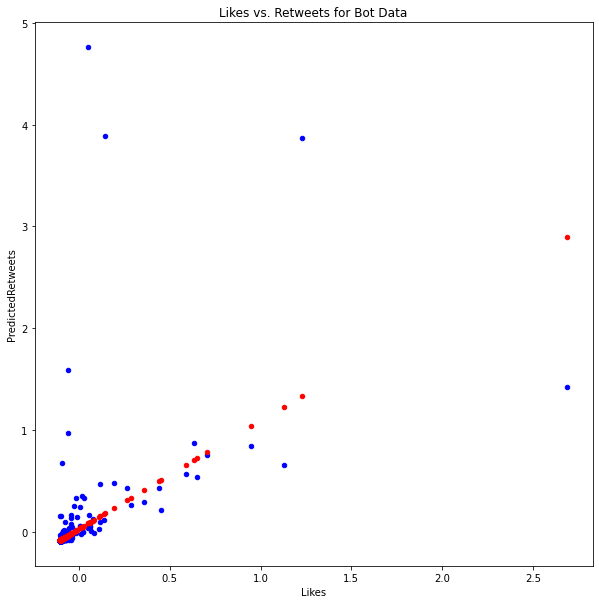

In [13]:
lm_bot_retweets = LinearRegression().fit(norm_sum_bot[['Likes']], norm_sum_bot.Retweets)
norm_sum_bot.PredictedRetweets = lm_bot_retweets.predict(norm_sum_bot[['Likes']])
ax = norm_sum_bot.plot.scatter(x = 'Likes', y = 'Retweets', color = 'blue')
norm_sum_bot.plot.scatter(x = 'Likes', y = 'PredictedRetweets', ax=ax, color = 'red', figsize = (10, 10))
plt.title('Likes vs. Retweets for Bot Data')
lm_bot_retweets.coef_, lm_bot_retweets.intercept_

C:\Users\andre\AppData\Local\Temp\ipykernel_19496\3865243617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_sum_human.PredictedReplies = lm_human_replies.predict(norm_sum_human[['Likes']])


(array([0.74547569]), 0.002086621590071792)

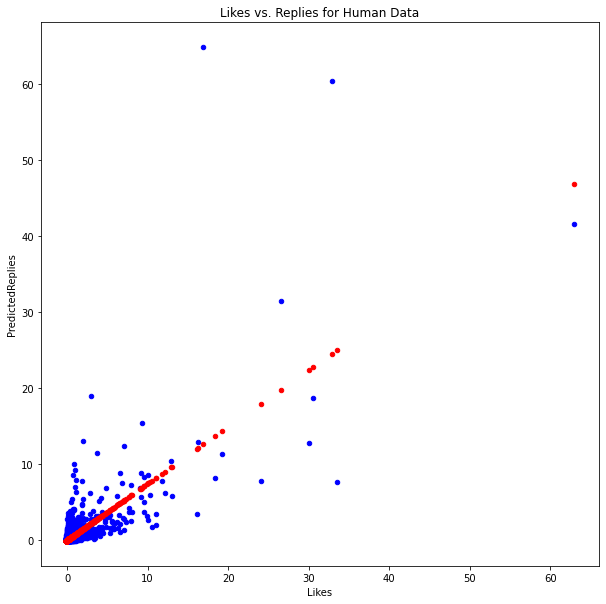

In [14]:
lm_human_replies = LinearRegression().fit(norm_sum_human[['Likes']], norm_sum_human.Replies)
norm_sum_human.PredictedReplies = lm_human_replies.predict(norm_sum_human[['Likes']])
ax = norm_sum_human.plot.scatter(x = 'Likes', y = 'Replies', color = 'blue')
norm_sum_human.plot.scatter(x = 'Likes', y = 'PredictedReplies', ax=ax, color = 'red', figsize = (10, 10))
plt.title('Likes vs. Replies for Human Data')
lm_human_replies.coef_, lm_human_replies.intercept_

C:\Users\andre\AppData\Local\Temp\ipykernel_19496\3001415482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_sum_bot.PredictedReplies = lm_bot_replies.predict(norm_sum_bot[['Likes']])


(array([0.76340332]), -0.010885975465807787)

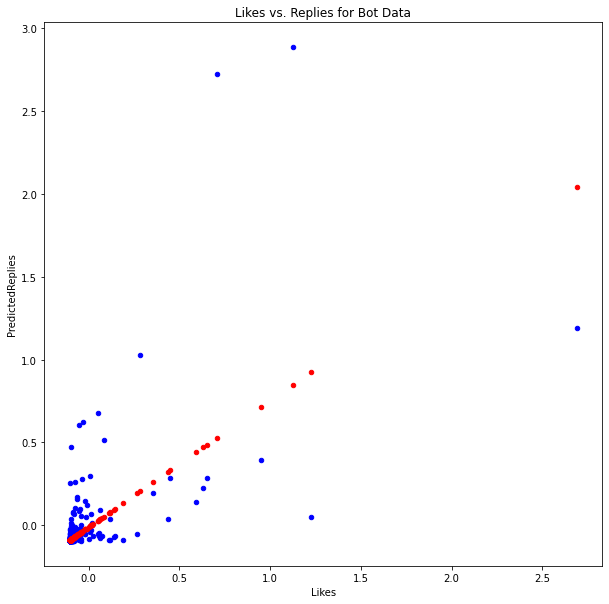

In [15]:
lm_bot_replies = LinearRegression().fit(norm_sum_bot[['Likes']], norm_sum_bot.Replies)
norm_sum_bot.PredictedReplies = lm_bot_replies.predict(norm_sum_bot[['Likes']])
ax = norm_sum_bot.plot.scatter(x = 'Likes', y = 'Replies', color = 'blue')
norm_sum_bot.plot.scatter(x = 'Likes', y = 'PredictedReplies', ax=ax, color = 'red', figsize = (10, 10))
plt.title('Likes vs. Replies for Bot Data')
lm_bot_replies.coef_, lm_bot_replies.intercept_

# Text Analysis

After looking at various linear regression plots, we decided to move onto text analysis since we had access to the texts of multiple tweets for specific Twitter accounts. First, we used the positive.txt and negative.txt files to document a list of positive and negative words that could be used for sentiment analysis.

In [16]:
positives = set(open('positive.txt').read().split()) 
negatives = set(open('negative.txt').read().split())

In [17]:
scraperdata

,id,tweet,hashtags,cashtags,user_id,nlikes,nreplies,nretweets,bot_or_human
0,1584288573440036864,"Put the ""Bite"" into ""Exhibited"" https://t.co/...",[],[],787405734442958848,2,0,0,bot
1,1584243270632497152,"You can't get the ""Sin"" out of ""Nosiness"" htt...",[],[],787405734442958848,4,0,2,bot
2,1584197985990504449,"Let's put the ""Earl"" into ""Fearless"" https://...",[],[],787405734442958848,0,0,0,bot
3,1584152675314458624,"Be the ""Nab"" in ""Cinnabar"" https://t.co/tF0cM...",[],[],787405734442958848,0,0,0,bot
4,1584107378420887552,"We need ""Cat"" to spell ""Obfuscate"" https://t....",[],[],787405734442958848,3,0,0,bot
...,...,...,...,...,...,...,...,...,...
15,1529515450316382208,"@Tagard_McStone Let's not be too harsh now, ju...",[],[],815529979,1,0,0,human
16,1522622120529842176,@Tumbledorez This was a whole Habbo Mood™ htt...,[],[],815529979,1,0,0,human
17,1521197191821336576,@Tumbledorez Just wait until I hit you with th...,[],[],815529979,0,0,0,human
18,1521190723147628544,It was so cool to not only be celebrated for o...,[],[],815529979,2,0,0,human


We then took out certain punctuation marks from the tweets and then split these tweets into a list so that we could obtain the word count of each tweet. We added the split tweets and tweet length to a copy of the original dataframe.

In [18]:
scraperdata_copy = scraperdata.copy()
scraperdata_copy.tweet = scraperdata_copy.tweet.map(lambda t: str(t).replace('!', '').replace('.', '').replace('?', '').replace(',', '').replace('@', '').lower())
scraperdata_copy["Split Tweets"] = scraperdata_copy.tweet.apply(lambda x: str(x).split())
scraperdata_copy["Split Tweet Length"] = scraperdata_copy["Split Tweets"].apply(lambda x: len(x))
scraperdata_copy

,id,tweet,hashtags,cashtags,user_id,nlikes,nreplies,nretweets,bot_or_human,Split Tweets,Split Tweet Length
0,1584288573440036864,"put the ""bite"" into ""exhibited"" https://tco/e...",[],[],787405734442958848,2,0,0,bot,"[put, the, ""bite"", into, ""exhibited"", https://...",6
1,1584243270632497152,"you can't get the ""sin"" out of ""nosiness"" htt...",[],[],787405734442958848,4,0,2,bot,"[you, can't, get, the, ""sin"", out, of, ""nosine...",9
2,1584197985990504449,"let's put the ""earl"" into ""fearless"" https://...",[],[],787405734442958848,0,0,0,bot,"[let's, put, the, ""earl"", into, ""fearless"", ht...",7
3,1584152675314458624,"be the ""nab"" in ""cinnabar"" https://tco/tf0cm9...",[],[],787405734442958848,0,0,0,bot,"[be, the, ""nab"", in, ""cinnabar"", https://tco/t...",6
4,1584107378420887552,"we need ""cat"" to spell ""obfuscate"" https://tc...",[],[],787405734442958848,3,0,0,bot,"[we, need, ""cat"", to, spell, ""obfuscate"", http...",7
...,...,...,...,...,...,...,...,...,...,...,...
15,1529515450316382208,tagard_mcstone let's not be too harsh now just...,[],[],815529979,1,0,0,human,"[tagard_mcstone, let's, not, be, too, harsh, n...",14
16,1522622120529842176,tumbledorez this was a whole habbo mood™ http...,[],[],815529979,1,0,0,human,"[tumbledorez, this, was, a, whole, habbo, mood...",8
17,1521197191821336576,tumbledorez just wait until i hit you with the...,[],[],815529979,0,0,0,human,"[tumbledorez, just, wait, until, i, hit, you, ...",15
18,1521190723147628544,it was so cool to not only be celebrated for o...,[],[],815529979,2,0,0,human,"[it, was, so, cool, to, not, only, be, celebra...",23


Once the tweets were split, we could begin our sentimental analysis. We computed the number of positive and negative words in each tweet, took their difference, and divided by the tweet length. Also, we used quantitative values instead of categorical values to classify accounts as bot or human to make values easier to work with when combining.

In [19]:
p = scraperdata_copy["Split Tweets"].map(lambda l: len([a for a in l if a in positives]))
n = scraperdata_copy["Split Tweets"].map(lambda l: len([n for n in l if n in negatives]))
scraperdata_copy["Sentiment"] = (p - n) / scraperdata_copy["Split Tweet Length"]
scraperdata_copy["bot_or_human"] = [0 if entry == 'human' else 1 for entry in scraperdata_copy["bot_or_human"]]
scraperdata_copy

,id,tweet,hashtags,cashtags,user_id,nlikes,nreplies,nretweets,bot_or_human,Split Tweets,Split Tweet Length,Sentiment
0,1584288573440036864,"put the ""bite"" into ""exhibited"" https://tco/e...",[],[],787405734442958848,2,0,0,1,"[put, the, ""bite"", into, ""exhibited"", https://...",6,0.000000
1,1584243270632497152,"you can't get the ""sin"" out of ""nosiness"" htt...",[],[],787405734442958848,4,0,2,1,"[you, can't, get, the, ""sin"", out, of, ""nosine...",9,0.000000
2,1584197985990504449,"let's put the ""earl"" into ""fearless"" https://...",[],[],787405734442958848,0,0,0,1,"[let's, put, the, ""earl"", into, ""fearless"", ht...",7,0.000000
3,1584152675314458624,"be the ""nab"" in ""cinnabar"" https://tco/tf0cm9...",[],[],787405734442958848,0,0,0,1,"[be, the, ""nab"", in, ""cinnabar"", https://tco/t...",6,0.000000
4,1584107378420887552,"we need ""cat"" to spell ""obfuscate"" https://tc...",[],[],787405734442958848,3,0,0,1,"[we, need, ""cat"", to, spell, ""obfuscate"", http...",7,-0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...
15,1529515450316382208,tagard_mcstone let's not be too harsh now just...,[],[],815529979,1,0,0,0,"[tagard_mcstone, let's, not, be, too, harsh, n...",14,0.000000
16,1522622120529842176,tumbledorez this was a whole habbo mood™ http...,[],[],815529979,1,0,0,0,"[tumbledorez, this, was, a, whole, habbo, mood...",8,0.000000
17,1521197191821336576,tumbledorez just wait until i hit you with the...,[],[],815529979,0,0,0,0,"[tumbledorez, just, wait, until, i, hit, you, ...",15,0.066667
18,1521190723147628544,it was so cool to not only be celebrated for o...,[],[],815529979,2,0,0,0,"[it, was, so, cool, to, not, only, be, celebra...",23,0.043478


Now that we had the sentiment value for each tweet, we took the sum of each tweet sentiment for a Twitter user and then used groupby to calculate the overall sentiment for an account. We then created a new dataframe that listed a corresponding Twitter user account ID, it's sentiment value based on the tweets we scraped, and whether it was classified as bot or human. This allowed us to later look at sentiment values for just bot accounts and just human accounts.

In [20]:
scraperdata_grouped = scraperdata_copy.groupby("user_id")
scraperdata_grouped_sum = scraperdata_grouped.Sentiment.sum()
scraperdata_grouped_sum

user_id
418                    0.371016
586                    1.528523
10202                  0.603325
12522                  1.509945
13253                  0.009862
                         ...   
1101849622073491456   -0.467698
1107378463114227712    0.000000
1109778441379950592    0.540812
1113425507624919040   -0.113155
1113577200664629249    0.000000
Name: Sentiment, Length: 15392, dtype: float64

In [21]:
scraperdata_bot_human = scraperdata_grouped.bot_or_human.mean()
scraperdata_bot_human

user_id
418                    0.0
586                    0.0
10202                  0.0
12522                  0.0
13253                  0.0
                      ... 
1101849622073491456    1.0
1107378463114227712    1.0
1109778441379950592    1.0
1113425507624919040    1.0
1113577200664629249    1.0
Name: bot_or_human, Length: 15392, dtype: float64

In [22]:
sentiment_combined = pandas.merge(scraperdata_grouped_sum, scraperdata_bot_human, on = "user_id")
sentiment_combined["User"] = sentiment_combined.index
sentiment_combined

,Sentiment,bot_or_human,User
user_id,,,
418,0.371016,0.0,418
586,1.528523,0.0,586
10202,0.603325,0.0,10202
12522,1.509945,0.0,12522
13253,0.009862,0.0,13253
...,...,...,...
1101849622073491456,-0.467698,1.0,1101849622073491456
1107378463114227712,0.000000,1.0,1107378463114227712
1109778441379950592,0.540812,1.0,1109778441379950592


In [23]:
bot_sentiment = sentiment_combined[sentiment_combined["bot_or_human"] == 1.0]
human_sentiment = sentiment_combined[sentiment_combined["bot_or_human"] == 0.0]

We have a series of histograms showing the sentiment distribution for all accounts, just bot accounts, and just human accounts. While all of these histograms had similar distributions, we looked at the average sentiment values for human accounts and bot accounts, and observed that human accounts had a higher sentiment value. We believe this may be a result of humans adding more emotional content into their tweets compared to bots, which may have more repetitive phrases that are more neutral than necessarily being positive and negative. 

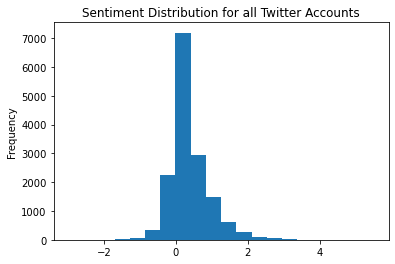

In [24]:
sentiment_combined.Sentiment.plot.hist(bins = 20)
plt.title("Sentiment Distribution for all Twitter Accounts")
plt.show()

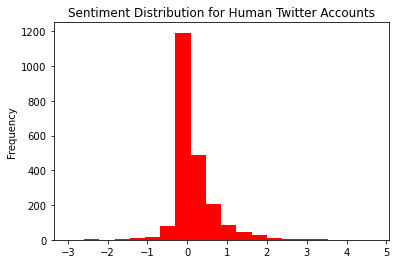

In [25]:
bot_sentiment.Sentiment.plot.hist(bins = 20, color = 'red')
plt.title("Sentiment Distribution for Human Twitter Accounts")
plt.show()

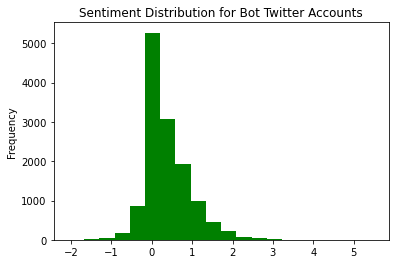

In [26]:
human_sentiment.Sentiment.plot.hist(bins = 20, color = 'green')
plt.title("Sentiment Distribution for Bot Twitter Accounts")
plt.show()

In [27]:
avg_sentiment_human = sentiment_combined[sentiment_combined["bot_or_human"] == 0.0].Sentiment.mean()
avg_sentiment_human 

0.37809319498621746

In [28]:
avg_sentiment_bot = sentiment_combined[sentiment_combined["bot_or_human"] == 1.0].Sentiment.mean()
avg_sentiment_bot

0.1878650774614337

Using what we had done earlier when we categorized bots with a value of 1 and humans with a value of 0, we were able to separate our original by data more easily into specifically bot datasets and specficially human datasets.

In [29]:
bots = scraperdata_copy[scraperdata_copy["bot_or_human"] == 1]
humans = scraperdata_copy[scraperdata_copy["bot_or_human"] == 0]

In [30]:
bots

,id,tweet,hashtags,cashtags,user_id,nlikes,nreplies,nretweets,bot_or_human,Split Tweets,Split Tweet Length,Sentiment
0,1584288573440036864,"put the ""bite"" into ""exhibited"" https://tco/e...",[],[],787405734442958848,2,0,0,1,"[put, the, ""bite"", into, ""exhibited"", https://...",6,0.000000
1,1584243270632497152,"you can't get the ""sin"" out of ""nosiness"" htt...",[],[],787405734442958848,4,0,2,1,"[you, can't, get, the, ""sin"", out, of, ""nosine...",9,0.000000
2,1584197985990504449,"let's put the ""earl"" into ""fearless"" https://...",[],[],787405734442958848,0,0,0,1,"[let's, put, the, ""earl"", into, ""fearless"", ht...",7,0.000000
3,1584152675314458624,"be the ""nab"" in ""cinnabar"" https://tco/tf0cm9...",[],[],787405734442958848,0,0,0,1,"[be, the, ""nab"", in, ""cinnabar"", https://tco/t...",6,0.000000
4,1584107378420887552,"we need ""cat"" to spell ""obfuscate"" https://tc...",[],[],787405734442958848,3,0,0,1,"[we, need, ""cat"", to, spell, ""obfuscate"", http...",7,-0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...
17,1567419717630976001,sere di settembre come un fermo immagine di ci...,[],[],184810052,1,0,1,1,"[sere, di, settembre, come, un, fermo, immagin...",12,0.000000
18,1567409658184212483,tutto quello che vorresti o non vorresti viver...,[],[],184810052,15,1,10,1,"[tutto, quello, che, vorresti, o, non, vorrest...",14,0.000000
19,1567166717867999232,cavallucciomar8 sembra proprio di si quando un...,[],[],184810052,2,0,0,1,"[cavallucciomar8, sembra, proprio, di, si, qua...",13,0.000000
0,1519417314139156482,twitch stop showing commercials about trannys...,[],[],350748440,0,0,0,1,"[twitch, stop, showing, commercials, about, tr...",15,-0.133333


In [31]:
humans

,id,tweet,hashtags,cashtags,user_id,nlikes,nreplies,nretweets,bot_or_human,Split Tweets,Split Tweet Length,Sentiment
0,1583935400359272449,no_lollygaggin gamersoutreach sending you get ...,[],[],875949740503859204,1,0,0,0,"[no_lollygaggin, gamersoutreach, sending, you,...",9,0.111111
1,1583871402599272448,shadowssassins cynic_alchemist girlfromshikahr...,[],[],875949740503859204,3,1,0,0,"[shadowssassins, cynic_alchemist, girlfromshik...",6,0.000000
2,1583371586198904832,cflotography i enjoyed the reference,[],[],875949740503859204,1,0,0,0,"[cflotography, i, enjoyed, the, reference]",5,0.000000
3,1583270024520736769,cflotography you're too kind 💜,[],[],875949740503859204,1,1,0,0,"[cflotography, you're, too, kind, 💜]",5,0.200000
4,1583247095422541825,can this one stream when has no voice https:/...,[],[],875949740503859204,4,1,0,0,"[can, this, one, stream, when, has, no, voice,...",9,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
15,1529515450316382208,tagard_mcstone let's not be too harsh now just...,[],[],815529979,1,0,0,0,"[tagard_mcstone, let's, not, be, too, harsh, n...",14,0.000000
16,1522622120529842176,tumbledorez this was a whole habbo mood™ http...,[],[],815529979,1,0,0,0,"[tumbledorez, this, was, a, whole, habbo, mood...",8,0.000000
17,1521197191821336576,tumbledorez just wait until i hit you with the...,[],[],815529979,0,0,0,0,"[tumbledorez, just, wait, until, i, hit, you, ...",15,0.066667
18,1521190723147628544,it was so cool to not only be celebrated for o...,[],[],815529979,2,0,0,0,"[it, was, so, cool, to, not, only, be, celebra...",23,0.043478


# Document Aggregation

Now, we moved on to document aggregation and computing TF, IDF, and TFIDF metrics for our data. We created a bag of words using our 'Split Tweet' column. We did this separately for bot and human accounts.

In [32]:
bots_s = bots.groupby("user_id")
bots_s.size()

user_id
30973                  20
622143                 20
717313                 20
742143                 20
759251                 20
                       ..
1101849622073491456    20
1107378463114227712    20
1109778441379950592    20
1113425507624919040    20
1113577200664629249    20
Length: 2185, dtype: int64

In [33]:
userBags_bots = bots_s["Split Tweets"].aggregate(lambda seriesofbags: [w for bag in seriesofbags for w in bag])
userBags_bots

user_id
30973                  [stephavaloss, cheers, iam_bryyy, we, sure, do...
622143                 [there's, a, hidden, world, behind, the, parce...
717313                 [icymi:, in, what, could, be, the, first, time...
742143                 [cop, 27:, uganda-tanzania, oil, pipeline, spa...
759251                 [what, do, you, think, happened, listen, to, a...
                                             ...                        
1101849622073491456    [an, infinitesimal, studded, tool, probably, i...
1107378463114227712    [#boston:, https://tco/tath6ifivs, #teheran:, ...
1109778441379950592    [jedwardcooper, coloring, outside, the, lines,...
1113425507624919040    [tonight, after, sunset, tell, a, stranger, th...
1113577200664629249    [https://tco/gyxc3is3ez, https://tco/u4d2whttr...
Name: Split Tweets, Length: 2185, dtype: object

In [34]:
humans_s = humans.groupby("user_id")
humans_s.size()

user_id
418                    20
586                    20
10202                  20
12522                  20
13253                  20
                       ..
1058218268350185472     3
1058739403995168768     1
1059570735990140928    20
1059844682648305664     1
1062384240376057856    15
Length: 13207, dtype: int64

In [35]:
userBags_humans = humans_s["Split Tweets"].aggregate(lambda seriesofbags: [w for bag in seriesofbags for w in bag])
userBags_humans

user_id
418                    [“hey, google, put, on, we, are, having, a, pa...
586                    [super70ssports, hall, of, fame, mikaelashiffr...
10202                  [kerrygorgone, cometeer, right, but, all, from...
12522                  [roadieshow, exactly, and, it, is, such, a, hu...
13253                  [exercitusmortem, unfortunatalie, you, are, in...
                                             ...                        
1058218268350185472    [how, many, other, chicago, residents, realize...
1058739403995168768    [ethanvasko, patmcafeeshow, needs, to, have, y...
1059570735990140928    [lrt, leholmes52, badvibesnochill, https://tco...
1059844682648305664    [i’ve, never, related, more, a, chalkboard, in...
1062384240376057856    [me, odio, por, todo, lo, q, hice, por, ti, lo...
Name: Split Tweets, Length: 13207, dtype: object

We looked specifically at Twitter accounts that had a total number of words greater than 700 across the tweets that we had webscraped. We felt that this was a reasonable threshold to specify as these tweets had a considerable amount of content that we could analyze. However, we are aware that we could have also made use of more tweets by lowering this threshold. 

In [36]:
talkers_humans = userBags_humans[userBags_humans.map(len) > 700]
len(talkers_humans)

191

In [37]:
talkers_bots = userBags_bots[userBags_bots.map(len) > 700]
len(talkers_bots)

41

Using this data, we computed the TF, IDF, and TFIDF matrices for human accounts and bot accounts. We wanted to normalize all words by their frequency as they appeared in tweets for a given user, de-emphasizing common words. From the tweets we looked at, we noticed that some of the more common words in tweets for human accounts were articles, whereas bot accounts had more random words - in this case we noticed more Spanish words. 

When comparing the TFIDF matrices for bot and human accounts, we noticed that TFIDF values were generally higher for certain words on certain Twitter bot user accounts compared to human accounts. This may explain the facts that bot accounts may have more tweets that repeat certain words or phrases compared to human accounts. This behavior is something that we have noticed when scrolling through Twitter. 

In [38]:
TF_humans = talkers_humans.apply(lambda talker: pandas.Series(talker).value_counts())
TF_humans

,the,and,to,of,a,i,we,on,our,is,...,$15/30,pitching,https://tco/czp4bf9sbs,https://tco/e8f6adzvab,leagues,sponsorships,$150,https://tco/1knrqo7y2q,⛹⛹️‍♀️,https://tco/imwl5gwmv6
user_id,,,,,,,,,,,,,,,,,,,,,
813286,36.0,31.0,30.0,23.0,14.0,10.0,9.0,9.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7370332,25.0,17.0,6.0,13.0,12.0,11.0,2.0,10.0,NaN,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14246001,18.0,5.0,26.0,17.0,14.0,NaN,5.0,7.0,1.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14266598,37.0,1.0,19.0,14.0,6.0,NaN,1.0,7.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14701062,32.0,20.0,22.0,16.0,16.0,1.0,NaN,17.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858354574893219840,19.0,16.0,24.0,8.0,14.0,3.0,4.0,5.0,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862570662216384512,24.0,7.0,21.0,13.0,12.0,4.0,1.0,2.0,1.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
892601046488330241,19.0,9.0,28.0,8.0,21.0,1.0,2.0,7.0,2.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
DF_humans = TF_humans.count() #how many rows of each column contain non-NAN values
float(len(TF_humans)) / DF_humans
IDF_humans = numpy.log(float(len(TF_humans)) / DF_humans)
IDF_humans

the                       0.152407
and                       0.170869
to                        0.164677
of                        0.170869
a                         0.010526
                            ...   
sponsorships              5.252273
$150                      5.252273
https://tco/1knrqo7y2q    5.252273
⛹⛹️‍♀️                    5.252273
https://tco/imwl5gwmv6    5.252273
Length: 32080, dtype: float64

In [40]:
TFIDF_humans = TF_humans * IDF_humans
TFIDF_humans = TFIDF_humans.replace(numpy.nan, 0)
TFIDF_humans

,the,and,to,of,a,i,we,on,our,is,...,$15/30,pitching,https://tco/czp4bf9sbs,https://tco/e8f6adzvab,leagues,sponsorships,$150,https://tco/1knrqo7y2q,⛹⛹️‍♀️,https://tco/imwl5gwmv6
user_id,,,,,,,,,,,,,,,,,,,,,
813286,5.486652,5.296941,4.940313,3.929988,0.147370,5.073413,3.056567,1.593897,3.785199,1.517427,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7370332,3.810175,2.904774,0.988063,2.221298,0.126317,5.580754,0.679237,1.770996,0.000000,2.655498,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14246001,2.743326,0.854345,4.281604,2.904774,0.147370,0.000000,1.698093,1.239697,0.473150,1.517427,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14266598,5.639059,0.170869,3.128865,2.392167,0.063158,0.000000,0.339619,1.239697,0.473150,0.948392,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14701062,4.877024,3.417381,3.622896,2.733905,0.168423,0.507341,0.000000,3.010693,0.946300,0.758714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858354574893219840,2.895733,2.733905,3.952250,1.366953,0.147370,1.522024,1.358474,0.885498,0.473150,1.896784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
862570662216384512,3.657768,1.196083,3.458219,2.221298,0.126317,2.029365,0.339619,0.354199,0.473150,2.276141,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
892601046488330241,2.895733,1.537822,4.610959,1.366953,0.221055,0.507341,0.679237,1.239697,0.946300,1.138070,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [41]:
TF_bots = talkers_bots.apply(lambda talker: pandas.Series(talker).value_counts())
TF_bots

,de,la,que,a,el,en,y,un,los,se,...,thomson,2nd,1st,west:,wofford:,nance:,richardson:,east:,3rd,basement:
user_id,,,,,,,,,,,,,,,,,,,,,
14119371,45.0,31.0,26.0,23.0,22.0,18.0,18.0,15.0,13.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15562882,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19940791,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21271500,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21866534,1.0,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40212757,38.0,21.0,8.0,21.0,13.0,7.0,3.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40882376,NaN,NaN,NaN,10.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54938044,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62159419,33.0,2.0,20.0,4.0,6.0,14.0,6.0,1.0,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
DF_bots = TF_bots.count() #how many rows of each column contain non-NAN values
float(len(TF_bots)) / DF_bots
IDF_bots = numpy.log(float(len(TF_bots)) / DF_bots)
IDF_bots

de             1.315677
la             1.516347
que            1.516347
a              0.217065
el             1.634131
                 ...   
nance:         3.713572
richardson:    3.713572
east:          3.713572
3rd            3.713572
basement:      3.713572
Length: 10694, dtype: float64

We also performed further data cleaning by filling in NAN values with zeroes.

In [43]:
TFIDF_bots = TF_bots * IDF_bots
TFIDF_bots = TFIDF_bots.replace(numpy.nan, 0)
TFIDF_bots

,de,la,que,a,el,en,y,un,los,se,...,thomson,2nd,1st,west:,wofford:,nance:,richardson:,east:,3rd,basement:
user_id,,,,,,,,,,,,,,,,,,,,,
14119371,59.205456,47.006772,39.425035,4.992484,35.950872,27.294255,29.414349,21.164805,21.243697,17.676619,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15562882,0.000000,0.000000,0.000000,5.426613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19940791,0.000000,0.000000,0.000000,2.821839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21271500,0.000000,0.000000,0.000000,2.387710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21866534,1.315677,0.000000,0.000000,2.604774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40212757,49.995718,31.843297,12.130780,4.558355,21.243697,10.614432,4.902392,7.054935,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40882376,0.000000,0.000000,0.000000,2.170645,0.000000,0.000000,0.000000,1.410987,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
54938044,0.000000,0.000000,0.000000,1.953581,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
62159419,43.417334,3.032695,30.326950,0.868258,9.804783,21.228865,9.804783,1.410987,32.682611,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Clustering

Using the sentiment analysis we had done previously, we then proceeded to perform a KMeans analysis to cluster Twitter accounts by their computed sentiments. We decided upon using 5 clusters because we felt that this was enough to distinguish patterns between different groups of sentiments. We also calculated inertia and centers for each cluster.

In [44]:
# Cluster with K-Means
import sklearn.cluster

km = sklearn.cluster.KMeans(n_clusters= 5)

scraperdata_copy_for_km = scraperdata_copy.copy()
scraperdata_copy_for_km.drop(columns=["id", "tweet", "hashtags", "cashtags", "nlikes", "nreplies", "nretweets", "bot_or_human", "Split Tweets", "Split Tweet Length"], inplace=True)
scraperdata_copy_for_km = scraperdata_copy_for_km.replace(numpy.nan, 0)
scraperdata_copy_for_km.set_index("user_id", drop=True, inplace=True)
display(scraperdata_copy_for_km)

scrapterdata_km_prediction = km.fit_predict(scraperdata_copy_for_km.groupby("user_id").Sentiment.sum().to_frame())
scrapterdata_km_prediction = pandas.DataFrame(scrapterdata_km_prediction, columns=['Cluster'], index=scraperdata_copy_for_km.groupby("user_id").Sentiment.sum().to_frame().index)
scrapterdata_km_prediction.sort_values('Cluster', inplace=True)
scrapterdata_km_prediction

,Sentiment
user_id,
787405734442958848,0.000000
787405734442958848,0.000000
787405734442958848,0.000000
787405734442958848,0.000000
787405734442958848,-0.142857
...,...
815529979,0.000000
815529979,0.000000
815529979,0.066667


,Cluster
user_id,
473637241,0
2816901652,0
2817888651,0
2818639319,0
2823222895,0
...,...
18085741,4
162705721,4
162688725,4


In [45]:
scrapterdata_km_prediction.Cluster.value_counts()

3    7704
1    4108
4    2110
0     983
2     487
Name: Cluster, dtype: int64

In [46]:
# Total Within - Cluster Variance
km.inertia_

538.1590533361006

In [47]:
km.cluster_centers_

array([[-0.50279324],
       [ 0.52439346],
       [ 2.16228748],
       [ 0.04095474],
       [ 1.12669463]])

In [48]:
# Cluster Centroids (of Normalized Data)
pandas.DataFrame(km.cluster_centers_, columns=scraperdata_copy_for_km.columns)

,Sentiment
0,-0.502793
1,0.524393
2,2.162287
3,0.040955
4,1.126695


In [49]:
scrapterdata_km_prediction

,Cluster
user_id,
473637241,0
2816901652,0
2817888651,0
2818639319,0
2823222895,0
...,...
18085741,4
162705721,4
162688725,4


In [50]:
total = scraperdata_copy.groupby("user_id").bot_or_human.max().to_frame()
total

,bot_or_human
user_id,
418,0
586,0
10202,0
12522,0
13253,0
...,...
1101849622073491456,1
1107378463114227712,1
1109778441379950592,1


In [51]:
cluster_accounts = pandas.merge(scrapterdata_km_prediction, total, on = "user_id")
cluster_accounts

,Cluster,bot_or_human
user_id,,
473637241,0,0
2816901652,0,0
2817888651,0,0
2818639319,0,0
2823222895,0,0
...,...,...
18085741,4,1
162705721,4,0
162688725,4,0


Using our clustering and sentiment analysis from earlier, we decided to show the proportion of human and bot accounts within each cluster using a pie chart. While there were differences in proportions, we also indicated that there were differences in the number of bot and human accounts.

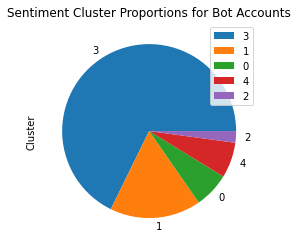

Total bot accounts: 2185


In [52]:
bot_clusters = cluster_accounts[cluster_accounts["bot_or_human"] == 1]
bot_clusters_proportions = bot_clusters["Cluster"].value_counts().to_frame()
bot_clusters_proportions.plot.pie(y = "Cluster")
plt.title("Sentiment Cluster Proportions for Bot Accounts")
plt.show()
print("Total bot accounts: " + str(bot_clusters.shape[0]))

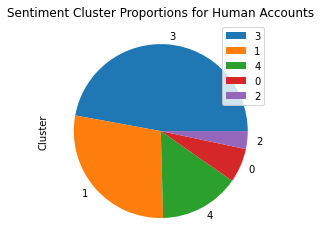

Total human accounts: 13207


In [53]:
human_clusters = cluster_accounts[cluster_accounts["bot_or_human"] == 0]
human_clusters_proportions = human_clusters["Cluster"].value_counts().to_frame()
human_clusters_proportions.plot.pie(y = "Cluster")
plt.title("Sentiment Cluster Proportions for Human Accounts")
plt.show()
print("Total human accounts: " + str(human_clusters.shape[0]))

## Conclusion

Going back to our initial research questions, we realized that just by looping through all of the ID's we looked at in the Kaggle dataset, we were able to obtain sufficient information to perform extensive analysis on these accounts. We were able to gather more of an insight into distinguishing characteristics between bot and human accounts.

Based on our analysis, our linear regression plot showed quantitative differences in number of impressions(likes, retweets, replies) for the human and bot Twitter accounts that were webscraped. From there, we were able to dive into text analysis, and we found that on average, human accounts had tweets with a higher overall sentiment compared to bot accounts. We then looked at human and bot accounts that had a significant number of words across all tweets (700 words). We used these accounts to develop TF, IDF, and TFIDF matrices. From these tables, we found that bot accounts had higher frequencies of certain words. Conversely, human accounts had a more diverse set of frequencies, which explains the repetive nature of Twitter bots in their tweets. Finally, we performed clustering to cluster Twitter accounts based on computed sentiments. We saw that most bot accounts were grouped in cluster 2, and since cluster 2 was formed with a sentiment value close to 0 since bots tend to have more generic language in their tweets compared to human accounts. 

Caveats: When computing the 'overall' sentiment for a Twitter account based on the sentiment for each individual tweet, we just took the sum of all tweet sentiments. However, to get a better representation for the sentiment value of an account, we may have considered using other descriptive statistics such as the mean tweet sentiment. 

Future work: After performing more analysis, we could go back to doing a multiple linear regression calculation to assess more interactions between the variables that were webscraped - likes, retweets, replies. We could also extend our work further by implementing a classification algorithm to classify Twitter accounts as bot or human accounts just by looking at the account tweets. We could also describe and identify more behaviors related to both human and bot accounts from a Twitter user's point of view. 

Open questions: 
  
  (1) How does AI efficiently distinguish between human and bot accounts and classify certain accounts as being spam 
      or malicious?

## Team Contribution for Part 3 Deliverable 

-Aidan B.: Developed webscrapper to Grab .csv Files. Helped with structuring the Jupyter Notebook so that QAC could be easily compiled later.

-Abhay R.: Did Initial Data Cleaning and Visualizations. Looked into text analysis and helped merge data to perform calculations.

-Brandon W.: Helped With Writing the Conclusion Section of QAC and Helped in Creating Some of the Data Visualization. Also helped create the pie chart for sentiment clustering visualization.

-William K.: Helped with Doing Linear Regression Analysis and Basic Data Visualization. Helped with providing labels for plots. Changed Linear Regression formulas for human and bot comparisons.

-Andrew T.: Managed the GitHub, Helped with Writing the Question and Analysis Section of QAC. Assisted with KMeans Clustering calculations.